## DDO Coursework Part 1: CSTR PID Tuning 

This notebook is the core of the unconstrained high-dimensional DDO PID Tuning coursework. The objective of this coursework is to develop a suitable DDO algorithm in your group to suitably optimise the controller gain variables to best control the CSTR system.

__Key Resources & Uses:__

1.  ML4CE_CSTR_PID_CW.ipynb --> This notebook can be used to assess your algorithm's performance and also compare it to alternative DDO algorithms.

2.  CSTR_PID.py --> script containing the CSTR / PID test function scenario that your algorithm's will be optimising a PID.

3.  test_function.py & utils.py --> these are already imported for you, as they are the backend of the benchmarking procedure, but you do __NOT__ need to edit either of these.

4.  your_alg.py --> this is the wrapper function that you will build your algorithm into! Please ensure this script can be run in this framework, as that is how you will be assessed. Also, please change the name to __CW1_your_team_name.py__ for submission.

These are your imports - libraries and test functions should remain the same, however, you can play around with importing other algorithms to benchmark yours against - beaware of different package requirements for each algorithm.

In [1]:
# libraries
import matplotlib.pyplot as plt
import copy
import numpy as np

# Imports benchmarking routine and problem
from bm_routine import *

# Imports algorithms directory
from algorithms import *


### Main Benchmarking Routine

This block is where you can select which algorithms you wish to assess. The CSTR PID case study is already loaded, and N_x_l should remain at 32 given the problem's dimensionality.

In [2]:
home_dir = "images/trajectory_plots_1D_&_tables"

# Comment in/out algorithms you wish to benchmark
algorithms_test = [
    opt_COBYLA,
    your_alg,
    TuRBO_Optimizer,
    COBYQA,
]

# Do not change this
functions_test = ["cstr_pid_f"]

###########################
# Optimization parameters #
###########################

# Number of input dimensions - do not change
N_x_l = [32]  

# starting points on the trajectory of the algorithm on the test function
start_ = [15]  

# Repetition of results
reps = 3

# These are the number of function evaluations (length of trajectory) foreach run in reps. The number depends on the input dimension N_x_l
f_eval_l = [100]  

home_dir  = 'images/CSTR_PID/trajectory_plots_1D_&_tables'
SafeData = False

In [3]:
# Runs the unconstrained benchmarking using the parameters as above ^
info, trajectories, timestamp = ML4CE_uncon_eval(
    N_x_l, f_eval_l, functions_test, algorithms_test, reps, home_dir, SafeData=SafeData
)

=====================  cstr_pid_f D32
==  opt_COBYLA


100%|██████████| 3/3 [00:08<00:00,  2.93s/it]


==  your_alg


100%|██████████| 3/3 [00:07<00:00,  2.41s/it]


==  TuRBO_Optimizer


100%|██████████| 3/3 [00:37<00:00, 12.42s/it]


==  COBYQA


100%|██████████| 3/3 [00:08<00:00,  2.80s/it]


### Plot Trajectory to Compare Performance

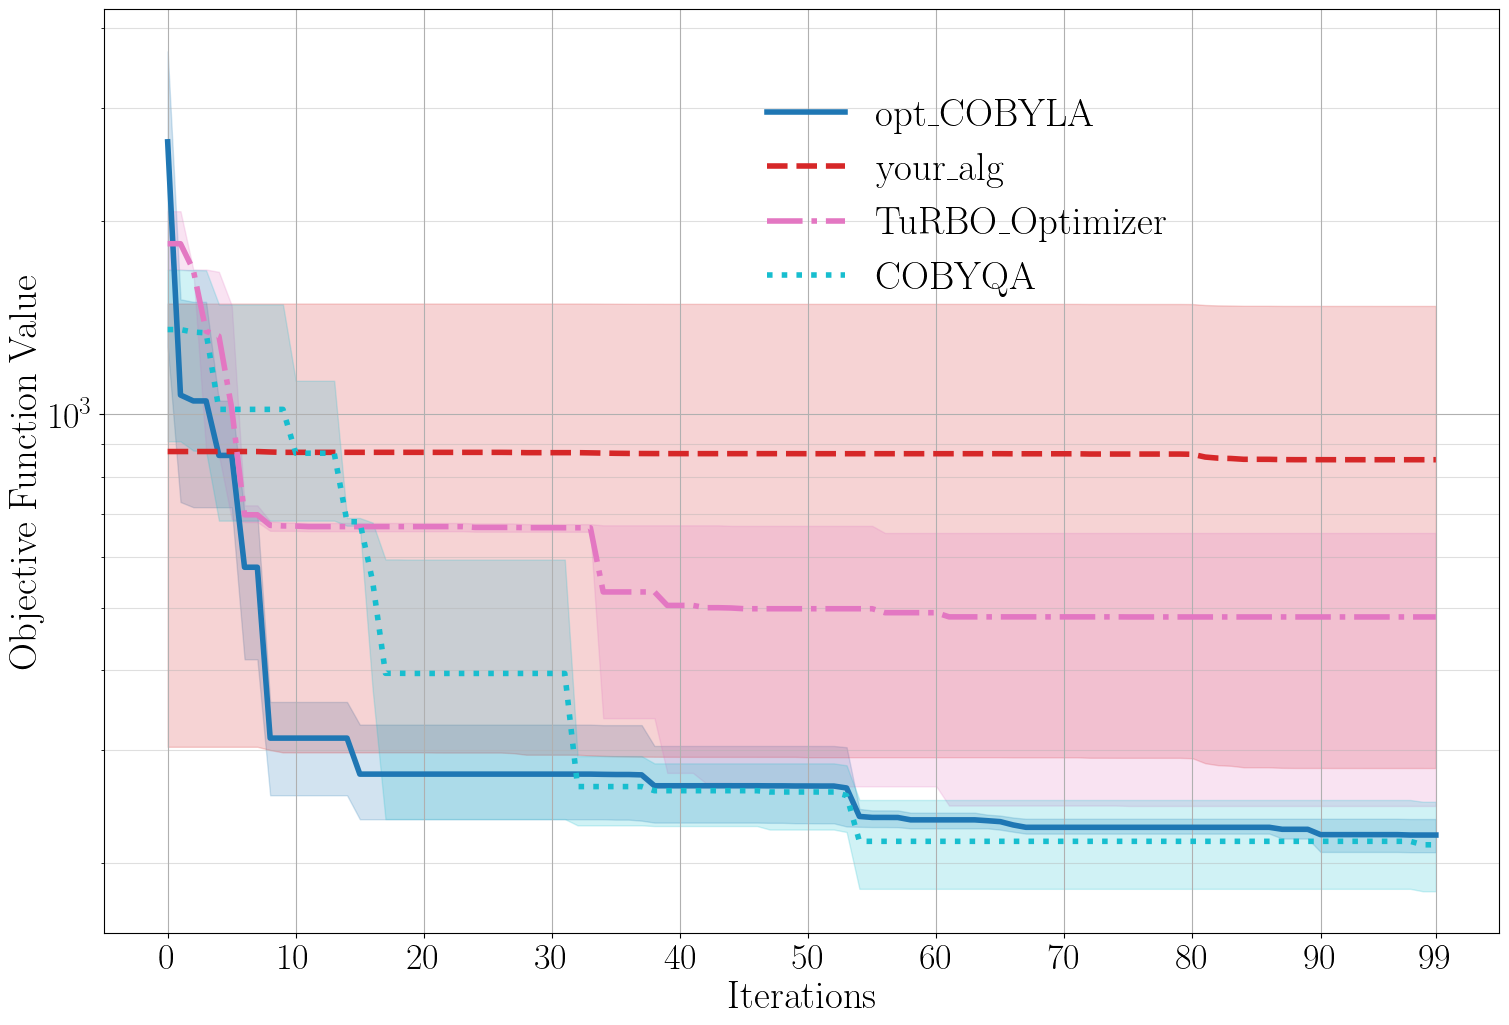

In [4]:
ML4CE_uncon_graph_abs(
    trajectories,
    algorithms_test,
    functions_test,
    N_x_l,
    home_dir,
    timestamp,
    SafeFig=SafeData,
)

### Print Benchmarking Performance Assessment Table

==   opt_COBYLA  ==
==   your_alg  ==
==   TuRBO_Optimizer  ==
==   COBYQA  ==


c:\Users\Emma\anaconda3\envs\DDOPID\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Emma\anaconda3\envs\DDOPID\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


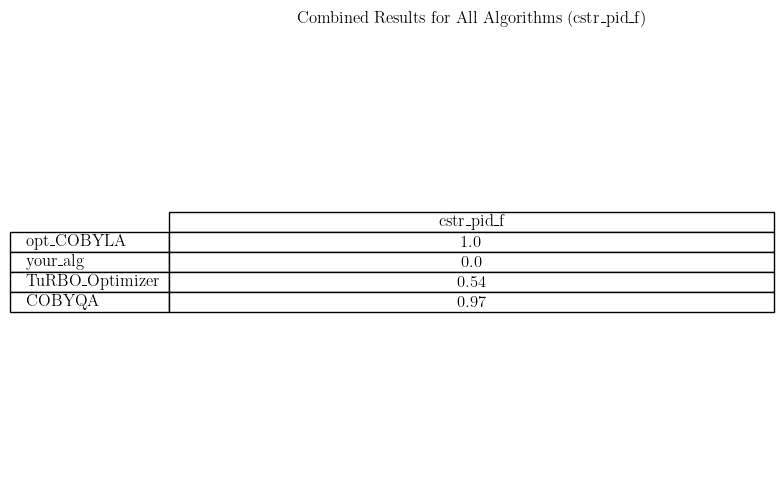

In [7]:
# Note, the algorithms loaded as examples are state of the art...
# So, don't be disheartened if your algorithms don't perform as well as some of these!
# This is just a way for you to see how we can benchmark different algorithms against each other.
array = ML4CE_uncon_table(trajectories,algorithms_test,functions_test,[], N_x_l,start_)
ML4CE_uncon_table_plot(array, functions_test, algorithms_test, N_x_l, home_dir, timestamp)

### Visualisation of PID Performance

If you wish, you can extract the optimum (best set of K-values) generated by a given algorithm, and then plot the setpoint and manipulated variables plots.

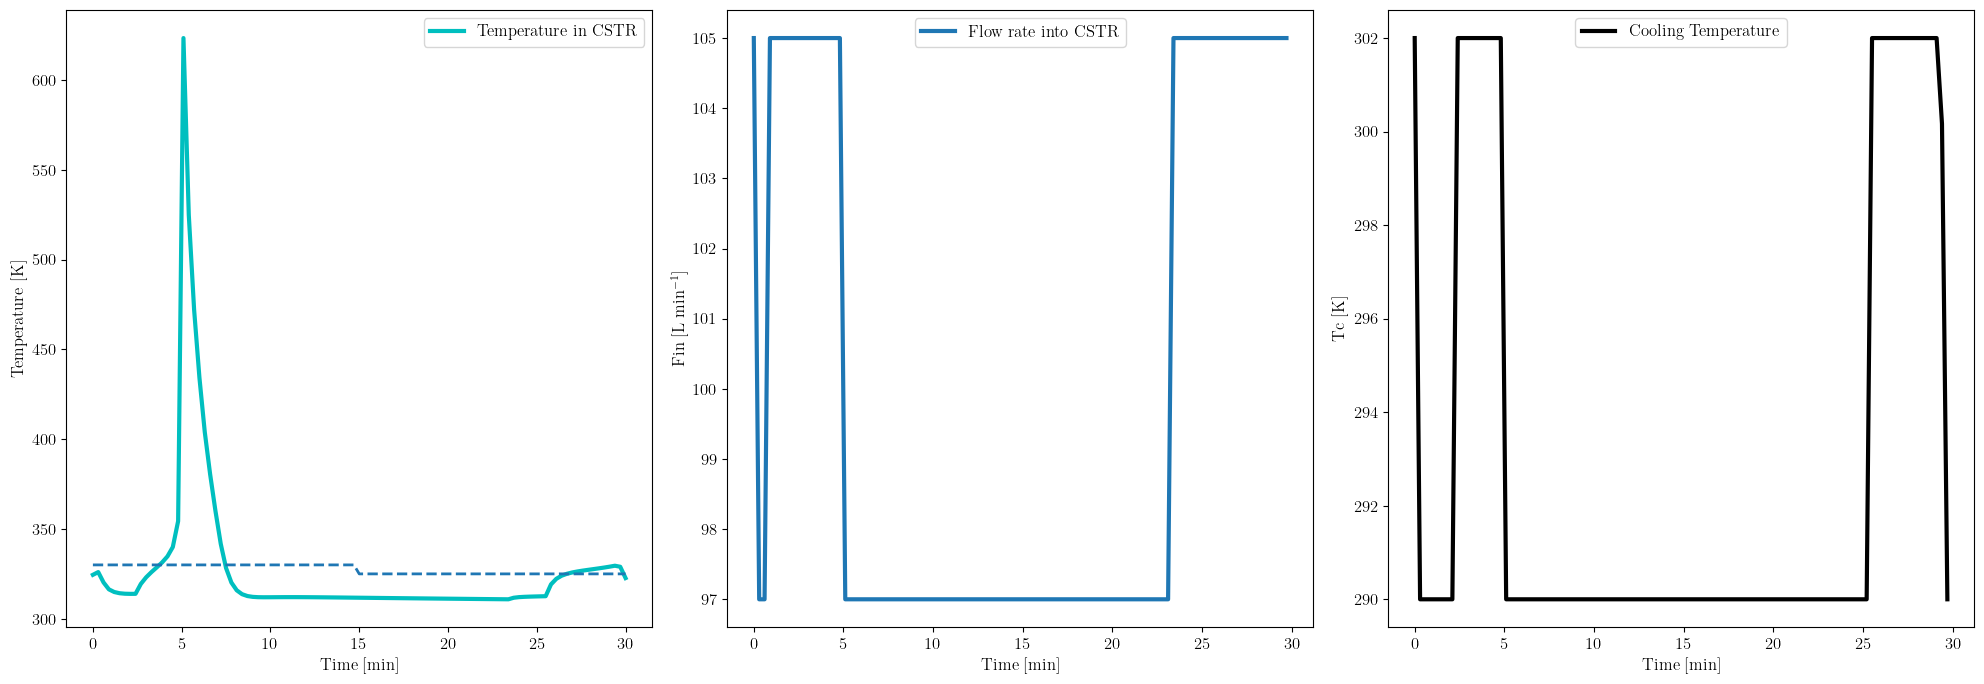

In [12]:
K_opt = trajectories['D32']['cstr_pid_f']['x_list']['your_alg'][0][-1]
CSTR = CSTRSimulation()
CSTR.plot_result_ct(K_opt)